In [78]:
import os
import sys
project_dir = os.getcwd().split('notebooks')[0]
sys.path.append(project_dir)

In [79]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import sklearn.preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from src.utils.extract_data import *
from src.utils.metrics_plot import *
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.metrics import multilabel_confusion_matrix
from statistics import mean

# RAPPEL MÉTRIQUES
--> elles se décomposent en **micro**, **macro** et **weighted** en général
- micro en général pour la généralisation de la classification binaire à la multi-labels
- macro comme une moyenne de la métrique sur chacun des labels (les labels sont donc supposés équitablement répartis dans l'échantillon) 
- weighted: on fait une moyenne pondérée de la métrique où balance par le poids ie la fréquence d'apparition du label.

\
Ici on choisira **micro**

 On rappelle également que: 
## Precision 
$$precision = \frac{TP}{TP+FP}$$ 
## Recall 
$$recall= \frac{TP}{TP+FN} $$
## F1-score
 $$f1-score= \frac{precision * recall}{precision + recall} $$
## Hamming Loss
 hamming loss = la proportion de labels incorrets 
 
 
 



# Préparation des données

In [178]:
transform_parquet_to_csv(os.path.join(project_dir,'dataset2.parquet'),os.path.join(project_dir,'dataset.csv'))

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,...,usage_feature_119,usage_feature_120,usage_feature_121,usage_feature_122,usage_feature_123,usage_feature_124,usage_feature_125,usage_feature_126,usage_feature_127,usage_feature_128
song_index,,,,,,,,,,,,,,,,,,,,,
195,0,0,0,0,0,0,0,0,0,0,...,0.008582,-0.000024,-0.272207,0.210503,0.030972,0.080964,-0.015423,0.102148,0.365081,-0.066897
417,0,0,0,0,0,0,0,0,0,1,...,-0.182309,-0.051225,-0.004617,-0.005726,-0.038334,-0.063972,0.053881,-0.001152,0.045032,0.027505
530,0,0,0,0,1,0,0,0,0,0,...,-0.044620,-0.132282,-0.141684,-0.106271,-0.189065,-0.229804,0.083824,-0.160790,0.040417,-0.094503
909,0,0,0,0,0,0,0,0,0,1,...,-0.127573,-0.068515,-0.106374,-0.102694,-0.066937,0.026911,-0.032158,0.063670,-0.026653,-0.068251
1257,0,0,0,0,0,0,0,0,0,0,...,0.024463,-0.052952,-0.059056,0.041670,-0.025673,-0.000446,-0.003438,0.060359,0.058938,0.029523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,0,0,0,0,1,0,0,0,0,0,...,-0.034780,0.112294,-0.084898,-0.191570,0.153120,0.106828,0.056458,0.127816,0.086341,-0.024928
49589,0,0,0,0,0,0,0,1,0,0,...,0.063418,0.166352,0.021962,0.003740,0.146321,-0.094655,-0.118755,-0.008160,-0.068332,0.041923
49689,0,0,0,0,0,0,0,0,0,0,...,-0.000624,-0.037719,0.018047,0.028091,-0.000380,0.015697,-0.035737,-0.022669,-0.003089,-0.014504


In [80]:
df=pd.read_csv(os.path.join(project_dir,'dataset.csv'))
X,Y=extract_values_array(df,p=1,audio=True,usage=False)
l=list(df.columns[0:22])
l.remove('song_index')

In [180]:
X.shape

(50562, 256)

## Mise en forme des résultats 


In [81]:
metrics=['Accuracy','Precision micro', 'Recall micro', 'F1 score micro', 'Hamming-Loss']
final_res=pd.DataFrame(columns=metrics)

<AxesSubplot:>

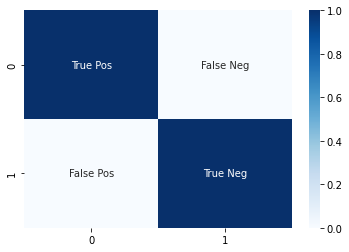

In [82]:
labels = ["True Pos","False Neg","False Pos","True Neg"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(np.eye(2), annot=labels, fmt="", cmap='Blues')

# Méthode 1: Naive - TOP GENRE 
Attribuer le genre le plus représenté: le rock




In [83]:
df_naif=pd.DataFrame(columns=l)
n=df.shape[0]
for label in l: 
  if label!='rock':
    df_naif[label]=np.zeros(n, dtype=int)
  else :
    df_naif[label]=np.zeros(n, dtype=int)+1
df_naif

,asian,rnb,reggae,blues,pop,dance,folk,arabic-music,indie,rock,...,latin,classical,k-pop,brazilian,metal,rap,jazz,electronic,african,country
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50557,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50558,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50559,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
50560,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [84]:
y_pred = df_naif.values
y_true = df[l].values

In [85]:
r=all_metrics(y_true,y_pred)

In [86]:
final_res.loc['Top Genre']=r

In [87]:
final_res

,Accuracy,Precision micro,Recall micro,F1 score micro,Hamming-Loss
Top Genre,0.108,0.162,0.138,0.149,0.088


# Méthode 2: L régressions logistiques unilabel


## Audio feature only - whitout penalization

##### ROC


In [88]:
df_hat=pd.DataFrame()
df_test=pd.DataFrame()
n=len(l)
i=0
auc_labels=[]
for label in l:
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y[:,i],test_size=0.3, random_state=5)
    logreg = LogisticRegression(max_iter=10000)
    filename= os.path.join(project_dir,'docs/LR/joblib_LR_audio_only/'+label)
    logreg = load_fit(logreg,X_train,Y_train,filename)
    y_hat = logreg.predict(X_test)
    df_hat[label] = y_hat
    df_test[label]=Y_test
    title='ROC curve ' + label + ' unilabel Logistic Regression'
    name_fig=os.path.join(project_dir,'docs/LR/ROC_LR_audio_only/'+label)
    AUC= plot_roc_curve(Y_test, y_hat, title=title, name_fig=name_fig,save=True)
    auc_labels.append(AUC)
    i+=1


<Figure size 432x288 with 0 Axes>

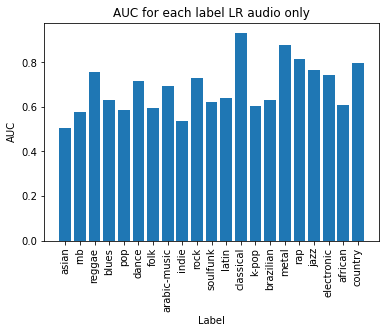

In [89]:
name_fig=os.path.join(project_dir,'docs/LR/ROC_LR_audio_only/auc')
graph_auc(auc_labels,'LR audio only',save=True,name_fig=name_fig)

##### Matrices de confusion 

In [90]:
y_true=df_test.values
y_pred=df_hat.values

In [91]:
conf=multilabel_confusion_matrix(y_true,y_pred)
i=0
for cm in conf:
    label=l[i]
    name_fig= os.path.join(project_dir,'docs/LR/CM_LR_audio_only/'+label)
    plot_confusion_matrix(cm,title=label,classes=[label,'Others'],normalize=True,save=True,name_fig=name_fig)
    i=i+1

<Figure size 432x288 with 0 Axes>

##### Résultats

In [92]:
r=all_metrics(y_true,y_pred)
final_res.loc['RL audio (seulement) & sans pénalisation']=r
final_res

,Accuracy,Precision micro,Recall micro,F1 score micro,Hamming-Loss
Top Genre,0.108,0.162,0.138,0.149,0.088
RL audio (seulement) & sans pénalisation,0.360,0.725,0.432,0.541,0.041


## Audio features only - penalization (Lasso)

Ici il s'agira d'appliquer un critère de pénalisation à la méthode Régression Logistique dans le but de sélectionner des variables, nous choisissons de faire le tuning de l'hyperparamètre pour chaque RL (chaque label). 
Nous comparons 2 résultats: 
- audio features uniquement 
- les deux 

L'argorithme utilisé pour faire l'optimisation de l'hyperparamètre C de la fonction LogisticRegression est  `GridSearchCV(estimator,parameters,cv)`: algorithme récursif qui va comparer en stratifiant l'échantillon train en `cv` parties, l'accuracy `cv`fois. 
La fonction `LogisticRegression` va prendre le paramètre `penalty=l1 `pour faire une sélection Lasso ie sélectionner des variables, l'algorithme de résolution est `saga` c'est une descente de gradient, plus rapide pour leslarges sets de données comme cecui ci, néanmoins très couteux en mémoire et en temps tout de même, nous choisissons le solver `liblinear`moins précis


##### ROC

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
df_hat=pd.DataFrame()
df_test=pd.DataFrame()
i=0
nb_feature_selected=[]
auc_labels=[]
for label in l:
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y[:,i],test_size=0.3, random_state=5)
    logreg = LogisticRegression(penalty='l1',solver='liblinear',max_iter=5000)
    parameters={'C':[1e-5,1e-4,1e-3,1e-2,1e-1,1]}
    gs=GridSearchCV(logreg,parameters,cv=3,verbose=3)
    filename=os.path.join(project_dir,'docs/LR/joblib_LR_audio_only_penal/'+label)
    logreg = load_fit(gs,X_train,Y_train,filename) 
    temp=logreg.best_estimator_.coef_
    n_label=(temp>0).sum()
    nb_feature_selected.append(n_label)
    y_hat= logreg.predict(X_test)
    df_hat[label] = y_hat
    df_test[label]=Y_test
    name_fig= os.path.join(project_dir,'docs/LR/ROC_LR_audio_only_penal/'+label)
    AUC= plot_roc_curve(Y_test, y_hat, title=label, name_fig=name_fig,save=True)
    auc_labels.append(AUC)
    i+=1


<Figure size 432x288 with 0 Axes>

In [101]:
nb_feature_selected

[0,
 54,
 108,
 31,
 114,
 103,
 38,
 108,
 114,
 66,
 49,
 109,
 75,
 89,
 51,
 62,
 50,
 43,
 45,
 102,
 92]

In [98]:
selected_features_audio=pd.DataFrame(columns=['Label','Number of Features Selected'])
selected_features_audio['Label']=l
selected_features_audio['Number of Features Selected']=nb_feature_selected
selected_features_audio.to_csv(os.path.join(project_dir,'docs/LR/selected_audio.csv'), index=False)

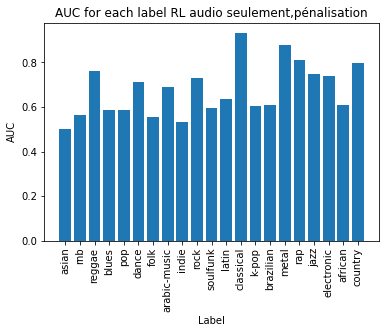

In [196]:
name=os.path.join(project_dir,'docs/LR/ROC_LR_audio_only_penal/AUC')
graph_auc(auc_labels,'RL audio seulement,pénalisation',save=True,name_fig=name)

##### Matrices de confusion

In [197]:
y_true=df_test.values
y_pred=df_hat.values
conf=multilabel_confusion_matrix(y_true,y_pred)
i=0
for cm in conf:
    label=l[i]
    name_fig= os.path.join(project_dir,'docs/LR/CM_LR_audio_only_penal/'+label)
    plot_confusion_matrix(cm,title=label,classes=[label,'Others'],normalize=True,save=True,name_fig=name_fig)
    i=i+1

<Figure size 432x288 with 0 Axes>

##### Résultats

In [198]:
r=all_metrics(y_true,y_pred)
final_res.loc['RL audio (seulement)& pénalisation (optimisée)']=r

## Usage features only - whitout penalization

In [106]:
X,Y=extract_values_array(df,p=1,audio=False,usage=True)

##### ROC

In [200]:
df_hat=pd.DataFrame()
df_test=pd.DataFrame()
n=len(l)
i=0
auc_labels=[]
for label in l:
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y[:,i],test_size=0.3, random_state=5)
    logreg = LogisticRegression(max_iter=10000)
    filename= os.path.join(project_dir,'docs/LR/joblib_LR_usage_only/'+label)
    logreg = load_fit(logreg,X_train,Y_train,filename)
    y_hat = logreg.predict(X_test)
    df_hat[label] = y_hat
    df_test[label]=Y_test
    title='ROC curve ' + label + ' unilabel Logistic Regression'
    name_fig=os.path.join(project_dir,'docs/LR/ROC_LR_usage_only/'+label)
    AUC= plot_roc_curve(Y_test, y_hat, title=title, name_fig=name_fig,save=True)
    auc_labels.append(AUC)
    i+=1


<Figure size 432x288 with 0 Axes>

##### Matrices de confusion

In [201]:
y_true=df_test.values
y_pred=df_hat.values
conf=multilabel_confusion_matrix(y_true,y_pred)
i=0
for cm in conf:
    label=l[i]
    name_fig= os.path.join(project_dir,'docs/LR/CM_LR_usage_only/'+label)
    plot_confusion_matrix(cm,title=label,classes=[label,'Others'],normalize=True,save=True,name_fig=name_fig)
    i=i+1

<Figure size 432x288 with 0 Axes>

##### Résultats

In [202]:
r=all_metrics(y_true,y_pred)
final_res.loc['RL usage (seulement) & sans pénalisation']=r
final_res

,Accuracy,Precision micro,Recall micro,F1 score micro,Hamming-Loss
Top Genre,0.108,0.162,0.138,0.149,0.088
RL audio (seulement) & sans pénalisation,0.360,0.725,0.432,0.541,0.041
RL audio (seulement)& pénalisation (optimisée),0.354,0.738,0.421,0.536,0.041
RL usage (seulement) & sans pénalisation,0.715,0.871,0.788,0.827,0.018


## Usage features only - with penalization:

##### ROC

In [107]:
df_hat=pd.DataFrame()
df_test=pd.DataFrame()
i=0
nb_feature_selected=[]
auc_labels=[]
for label in l:
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y[:,i],test_size=0.3, random_state=5)
    logreg = LogisticRegression(penalty='l1',solver='liblinear',max_iter=5000)
    parameters={'C':[1e-5,1e-4,1e-3,1e-2,1e-1,1]}
    gs=GridSearchCV(logreg,parameters,cv=3,verbose=3)
    filename=os.path.join(project_dir,'docs/LR/joblib_LR_usage_only_penal/'+label)
    logreg = load_fit(gs,X_train,Y_train,filename) 
    temp=logreg.best_estimator_.coef_
    n_label=(temp>0).sum()
    nb_feature_selected.append(n_label)
    y_hat= logreg.predict(X_test)
    df_hat[label] = y_hat
    df_test[label]=Y_test
    name_fig= os.path.join(project_dir,'docs/LR/ROC_LR_usage_only_penal/'+label)
    AUC= plot_roc_curve(Y_test, y_hat, title=label, name_fig=name_fig,save=True)
    auc_labels.append(AUC)
    i+=1


<Figure size 432x288 with 0 Axes>

In [108]:
selected_features_usage=pd.DataFrame(columns=['Label','Number of Features Selected'])
selected_features_usage['Label']=l
selected_features_usage['Number of Features Selected']=nb_feature_selected
selected_features_usage.to_csv(os.path.join(project_dir,'docs/LR/selected_usage.csv'), index=False)

##### Matrices de confusion

In [204]:
y_true=df_test.values
y_pred=df_hat.values
conf=multilabel_confusion_matrix(y_true,y_pred)
i=0
for cm in conf:
    label=l[i]
    name_fig= os.path.join(project_dir,'docs/LR/CM_LR_usage_only_penal/'+label)
    plot_confusion_matrix(cm,title=label,classes=[label,'Others'],normalize=True,save=True,name_fig=name_fig)
    i=i+1

<Figure size 432x288 with 0 Axes>

##### Résultats 

In [205]:
r=all_metrics(y_true,y_pred)
final_res.loc['RL usage (seulement) & pénalisation (optimisée)']=r
final_res

,Accuracy,Precision micro,Recall micro,F1 score micro,Hamming-Loss
Top Genre,0.108,0.162,0.138,0.149,0.088
RL audio (seulement) & sans pénalisation,0.360,0.725,0.432,0.541,0.041
RL audio (seulement)& pénalisation (optimisée),0.354,0.738,0.421,0.536,0.041
RL usage (seulement) & sans pénalisation,0.715,0.871,0.788,0.827,0.018
RL usage (seulement) & pénalisation (optimisée),0.715,0.871,0.787,0.827,0.018


## Audio & usage features  - with penalization

In [109]:
X,Y=extract_values_array(df,p=1,audio=True,usage=True)

##### ROC

In [207]:
def count_audio_usage(z):
    audio=0
    usage=0
    n=len(z) # n'a de sens que si n=384=256+128
    for i in range (len(z)):
        if z[i]>0 and i<256:
            audio+=1
        if z[i]>0 and i>255: 
            usage+=1
    return(audio,usage)

In [126]:
df_hat=pd.DataFrame()
df_test=pd.DataFrame()
i=0
n_features=[]
n_audio=[]
n_usage=[]
auc_labels=[]
for label in l:
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y[:,i],test_size=0.3, random_state=5)
    logreg = LogisticRegression(penalty='l1',solver='liblinear',max_iter=5000)
    parameters={'C':[1e-5,1e-4,1e-3,1e-2,1e-1,1]}
    gs=GridSearchCV(logreg,parameters,cv=3,verbose=3)
    filename=os.path.join(project_dir,'docs/LR/joblib_LR_audio_usage_penal/'+label)
    logreg = load_fit(gs,X_train,Y_train,filename) 
    temp=logreg.best_estimator_.coef_[0]
    n_label=(temp>0).sum()
    n_label_a,n_label_u=count_audio_usage(temp)
    n_audio.append(n_label_a)
    n_usage.append(n_label_u)
    n_features.append(n_label)
    y_hat= logreg.predict(X_test)
    df_hat[label] = y_hat
    df_test[label]=Y_test
    name_fig= os.path.join(project_dir,'docs/LR/ROC_LR_audio_usage_penal/'+label)
    AUC= plot_roc_curve(Y_test, y_hat, title=label, name_fig=name_fig,save=True)
    auc_labels.append(AUC)
    i+=1


<Figure size 432x288 with 0 Axes>

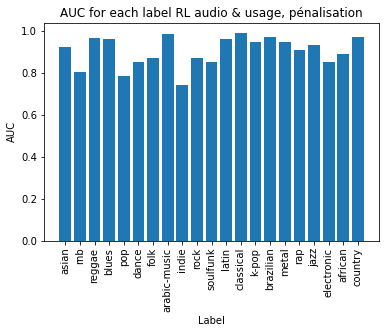

In [127]:
name=os.path.join(project_dir,'docs/LR/ROC_LR_audio_usage_penal/AUC')
graph_auc(auc_labels,'RL audio & usage, pénalisation',save=True,name_fig=name)

##### Étude des variables séléctionnées:

In [128]:
i=0
for i in range (21): 
    n_audio[i]=round((n_audio[i]/n_features[i])*100,2)
    n_usage[i]=round((n_usage[i]/n_features[i])*100,2)

In [129]:
selected_audio_usage=pd.DataFrame(columns=['Nombre de variables sélectionnées sur 384', "Pourcentage de variables audio" , "Pourcentage de variables usage"])

In [130]:
for i in range (21):
    label=l[i]
    selected_audio_usage.loc[label]=[n_features[i],n_audio[i],n_usage[i]]

In [131]:
m=round(mean(n_features),2)
ma=round(mean(n_audio),2)
mu=round(mean(n_usage),2)
selected_audio_usage.loc['Moyenne sur tous les Labels']=[m,ma,mu]

In [132]:
selected_audio_usage.to_csv(os.path.join(project_dir,'docs/LR/selected_audio_usage.csv'))

##### Matrice de confusion

In [215]:
y_true=df_test.values
y_pred=df_hat.values
conf=multilabel_confusion_matrix(y_true,y_pred)
i=0
for cm in conf:
    label=l[i]
    name_fig= os.path.join(project_dir,'docs/LR/CM_LR_audio_usage_penal/'+label)
    plot_confusion_matrix(cm,title=label,classes=[label,'Others'],normalize=True,save=True,name_fig=name_fig)
    i=i+1

<Figure size 432x288 with 0 Axes>

##### Résultats

In [216]:
r=all_metrics(y_true,y_pred)
final_res.loc['RL audio-usage & pénalisation (optimisée)']=r

In [218]:
final_res.to_csv(os.path.join(project_dir,'docs/LR/Results_RL.csv'))

In [ ]:
### ROC CURVE même graphique

In [155]:
def roc_same_graph(df,i,label,save=False,name_fig=None):
    plt.clf()
    plt.title(label)
    plt.plot([0, 1], [0, 1],'p--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    X_a,Y_a=extract_values_array(df,p=1,audio=True,usage=False)
    X_u,Y_u=extract_values_array(df,p=1,audio=False,usage=True)
    X,Y=extract_values_array(df,p=1,audio=True,usage=True)
    #audio
    X_train,X_test,Y_train,Y_test = train_test_split(X_a,Y_a[:,i],test_size=0.3, random_state=5)
    filename=os.path.join(project_dir,'docs/LR/joblib_LR_audio_only_penal/'+label)
    logreg = LogisticRegression(penalty='l1',solver='liblinear',max_iter=5000)
    gs=GridSearchCV(logreg,parameters,cv=3,verbose=3)
    logreg = load_fit(gs,X_train,Y_train,filename) 
    y_hat_a= logreg.predict(X_test)
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_hat_a)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = 'AUC audio = %0.2f' % roc_auc)
    #usage
    X_train,X_test,Y_train,Y_test = train_test_split(X_u,Y_u[:,i],test_size=0.3, random_state=5)
    filename=os.path.join(project_dir,'docs/LR/joblib_LR_usage_only_penal/'+ label)
    logreg = LogisticRegression(penalty='l1',solver='liblinear',max_iter=5000)
    gs=GridSearchCV(logreg,parameters,cv=3,verbose=3)
    logreg = load_fit(gs,X_train,Y_train,filename) 
    y_hat_u= logreg.predict(X_test)
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_hat_u)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'r', label = 'AUC usage = %0.2f' % roc_auc)
    #audiousage
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y[:,i],test_size=0.3, random_state=5)
    filename=os.path.join(project_dir,'docs/LR/joblib_LR_audio_usage_penal/'+label)
    logreg = LogisticRegression(penalty='l1',solver='liblinear',max_iter=5000)
    gs=GridSearchCV(logreg,parameters,cv=3,verbose=3)
    logreg = load_fit(gs,X_train,Y_train,filename) 
    y_hat= logreg.predict(X_test)
    fpr, tpr, threshold = metrics.roc_curve(Y_test, y_hat)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'g', label = 'AUC audio and usage = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    if not save:
        plt.show()
    else:
        plt.savefig(name_fig)

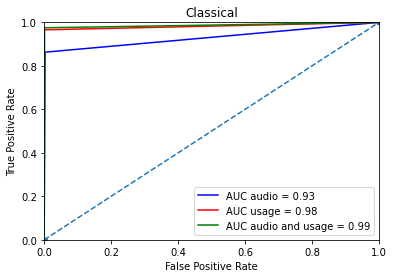

In [156]:
from sklearn import metrics
plt.title('Classical')
plt.plot([0, 1], [0, 1],'p--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#audio
X_a,Y_a=extract_values_array(df,p=1,audio=True,usage=False)
X_train,X_test,Y_train,Y_test = train_test_split(X_a,Y_a[:,12],test_size=0.3, random_state=5)
filename=os.path.join(project_dir,'docs/LR/joblib_LR_audio_only_penal/'+'classical')
logreg = LogisticRegression(penalty='l1',solver='liblinear',max_iter=5000)
gs=GridSearchCV(logreg,parameters,cv=3,verbose=3)
logreg = load_fit(gs,X_train,Y_train,filename) 
y_hat_a= logreg.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_hat_a)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC audio = %0.2f' % roc_auc)
#usage
X_u,Y_u=extract_values_array(df,p=1,audio=False,usage=True)
X_train,X_test,Y_train,Y_test = train_test_split(X_u,Y_u[:,12],test_size=0.3, random_state=5)
filename=os.path.join(project_dir,'docs/LR/joblib_LR_usage_only_penal/'+'classical')
logreg = LogisticRegression(penalty='l1',solver='liblinear',max_iter=5000)
gs=GridSearchCV(logreg,parameters,cv=3,verbose=3)
logreg = load_fit(gs,X_train,Y_train,filename) 
y_hat_u= logreg.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_hat_u)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'r', label = 'AUC usage = %0.2f' % roc_auc)
#audiousage
X,Y=extract_values_array(df,p=1,audio=True,usage=True)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y[:,12],test_size=0.3, random_state=5)
filename=os.path.join(project_dir,'docs/LR/joblib_LR_audio_usage_penal/'+'classical')
logreg = LogisticRegression(penalty='l1',solver='liblinear',max_iter=5000)
gs=GridSearchCV(logreg,parameters,cv=3,verbose=3)
logreg = load_fit(gs,X_train,Y_train,filename) 
y_hat= logreg.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_hat)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'g', label = 'AUC audio and usage = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.show()

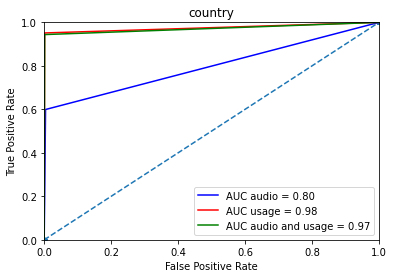

In [157]:
i=0
for label in l:
    filename=os.path.join(project_dir,'docs/LR/ROC/'+label)
    roc_same_graph(df,i,label,save=True,name_fig=filename)
    i=i+1